##### 1.PCA降维以降低运算成本

In [15]:
# 1）加载数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [16]:
# 2）train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

In [17]:
# 3）使用KNN算法对降维前的数据进行训练并计时
%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
print(knn_clf.score(X_test, y_test))

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 25.7 µs
0.9866666666666667


In [18]:
# 4）使用PCA对样本数据降维
# sklearn中的PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)


In [19]:
# 5）使用KNN算法对降维后的数据进行训练并计时
%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)
print(knn_clf.score(X_test_reduction, y_test))

CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 25.3 µs
0.6066666666666667


In [10]:
from sklearn.decomposition import PCA
# 先找到n个主成分
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

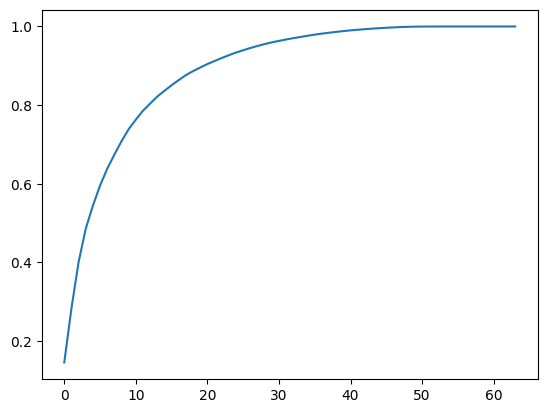

In [11]:
# 绘制能量叠加分布曲线
power = [];
for i in range(X_train.shape[1]):
     power.append(sum(pca.explained_variance_ratio_[:i+1]))
plt.plot([i for i in range(X_train.shape[1])],power)
plt.show()

In [20]:
from sklearn.decomposition import PCA
# 使用能量比决定k值
pca = PCA(0.95)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)
X_train_reduction.shape


(1347, 28)

In [21]:
# 使用KNN算法对降维后的数据进行训练并计时

%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)
print(knn_clf.score(X_test_reduction,y_test))

CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 26 µs
0.98


#### PCA降噪效果测试

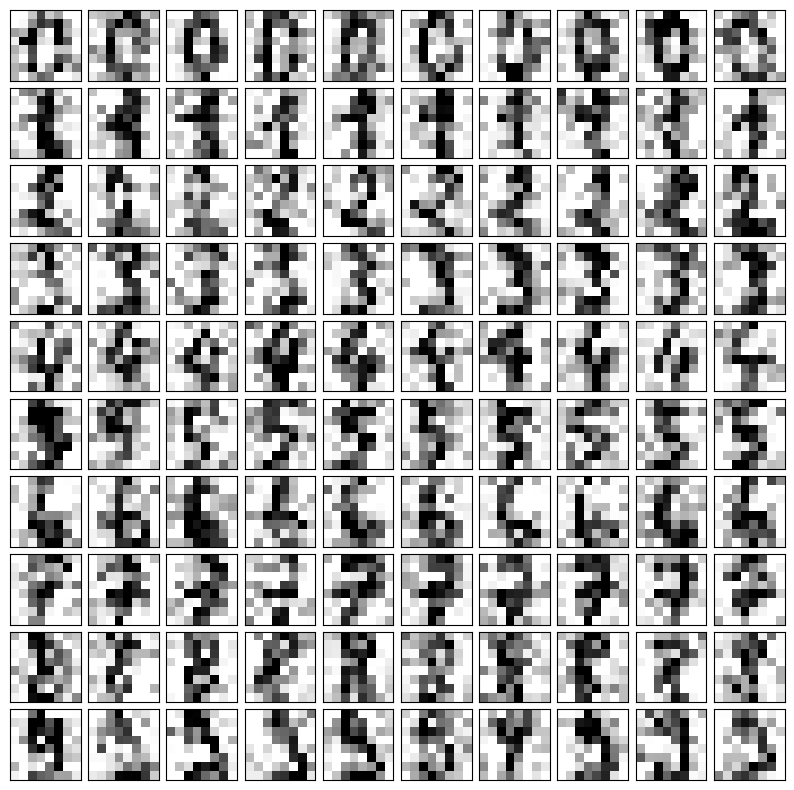

In [23]:
# 导入数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits();
X = digits.data
y = digits.target

# 在数据中放入噪声
noisy_X = X + np.random.normal(0,4,size=X.shape)

# 取每个类别的前10个样本，并进行绘制
for i in range(1,10):    
    example_digits = np.vstack([example_digits, noisy_X[y==i,:][:10]])

def plot_digits(data):    
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), 
                             subplot_kw={'xticks':[], 'yticks':[]}, 
                             gridspec_kw=dict(hspace=0.1, wspace=0.1)
                            )
    for i, ax in enumerate(axes.flat):        
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', 
                  interpolation='nearest',                  
                  clim=(0, 16)
                 )    
    plt.show()
    
plot_digits(example_digits)

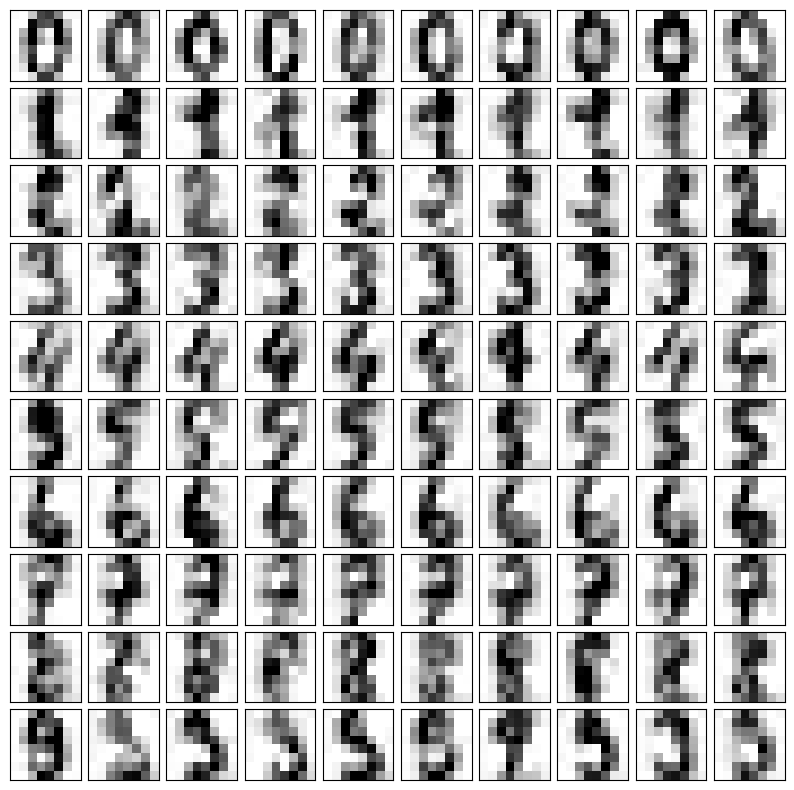

In [24]:
from sklearn.decomposition import PCA
pca = PCA(0.5)
pca.fit(noisy_X)
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)
